In [7]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator


log_paths  = {}

In [8]:
logs = {key: EventAccumulator(path) for key, path in log_paths.items()}

for log in logs.values():
    log.Reload()

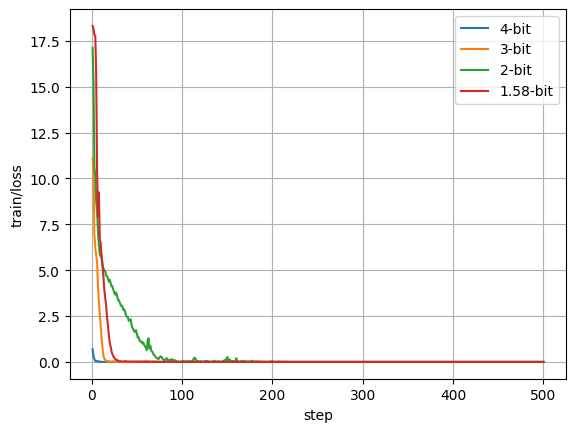

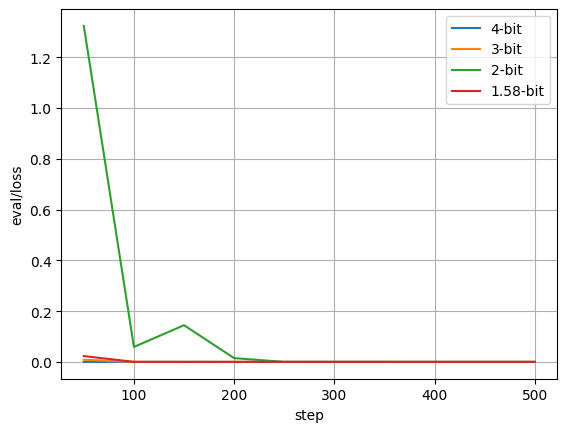

In [9]:
import matplotlib.pyplot as plt
import numpy as np

for key in ["train/loss", "eval/loss"]:
    for label, ea in logs.items():
        step = np.array([event.step for event in ea.Scalars(key)])
        value = np.array([event.value for event in ea.Scalars(key)])
        plt.plot(step, value, label=label)
        
    plt.grid()
    plt.xlabel("step")
    plt.ylabel(key)
    plt.legend()
    plt.show()